In [3]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

import torch.nn.functional as F
import torch.optim as optim
from torch import nn

import torchvision.transforms as T
from torchvision.datasets import ImageFolder

from sklearn.model_selection import train_test_split
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

print(torchvision.__version__)

import os
import cv2
from torch.utils.data import Dataset
from natsort import natsorted
import pandas as pd

0.18.0


In [4]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

cudnn.benchmark = True

# device

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [37]:
dataset_directory = "data"

In [38]:
root_directory = os.path.join(dataset_directory, "train")

In [39]:
Bean_0_directory = os.path.join(root_directory, "Bean_0")
Bitter_Gourd_1_directory = os.path.join(root_directory, "Bitter_Gourd_1")
Bottle_Gourd_2_directory = os.path.join(root_directory, "Bottle_Gourd_2")
Brinjal_3_directory = os.path.join(root_directory, "Brinjal_3")
Broccoli_4_directory = os.path.join(root_directory, "Broccoli_4")
Cabbage_5_directory = os.path.join(root_directory, "Cabbage_5")
Capsicum_6_directory = os.path.join(root_directory, "Capsicum_6")
Carrot_7_directory = os.path.join(root_directory, "Carrot_7")
Cauliflower_8_directory = os.path.join(root_directory, "Cauliflower_8")
Cucumber_9_directory = os.path.join(root_directory, "Cucumber_9")
Papaya_10_directory = os.path.join(root_directory, "Papaya_10")
Potato_11_directory = os.path.join(root_directory, "Potato_11")
Pumpkin_12_directory = os.path.join(root_directory, "Pumpkin_12")
Radish_13_directory = os.path.join(root_directory, "Radish_13")
Tomato_14_directory = os.path.join(root_directory, "Tomato_14")

In [40]:
Bean_0_images_filepaths = sorted([os.path.join(Bean_0_directory, f) for f in os.listdir(Bean_0_directory)])
Bitter_Gourd_1_images_filepaths = sorted([os.path.join(Bitter_Gourd_1_directory, f) for f in os.listdir(Bitter_Gourd_1_directory)])
Bottle_Gourd_2_images_filepaths = sorted([os.path.join(Bottle_Gourd_2_directory, f) for f in os.listdir(Bottle_Gourd_2_directory)])
Brinjal_3_images_filepaths = sorted([os.path.join(Brinjal_3_directory, f) for f in os.listdir(Brinjal_3_directory)])
Broccoli_4_images_filepaths = sorted([os.path.join(Broccoli_4_directory, f) for f in os.listdir(Broccoli_4_directory)])
Cabbage_5_images_filepaths = sorted([os.path.join(Cabbage_5_directory, f) for f in os.listdir(Cabbage_5_directory)])
Capsicum_6_images_filepaths = sorted([os.path.join(Capsicum_6_directory, f) for f in os.listdir(Capsicum_6_directory)])
Carrot_7_images_filepaths = sorted([os.path.join(Carrot_7_directory, f) for f in os.listdir(Carrot_7_directory)])
Cauliflower_8_images_filepaths = sorted([os.path.join(Cauliflower_8_directory, f) for f in os.listdir(Cauliflower_8_directory)])
Cucumber_9_images_filepaths = sorted([os.path.join(Cucumber_9_directory, f) for f in os.listdir(Cucumber_9_directory)])
Papaya_10_images_filepaths = sorted([os.path.join(Papaya_10_directory, f) for f in os.listdir(Papaya_10_directory)])
Potato_11_images_filepaths = sorted([os.path.join(Potato_11_directory, f) for f in os.listdir(Potato_11_directory)])
Pumpkin_12_images_filepaths = sorted([os.path.join(Pumpkin_12_directory, f) for f in os.listdir(Pumpkin_12_directory)])
Radish_13_images_filepaths = sorted([os.path.join(Radish_13_directory, f) for f in os.listdir(Radish_13_directory)])
Tomato_14_images_filepaths = sorted([os.path.join(Tomato_14_directory, f) for f in os.listdir(Tomato_14_directory)])

In [41]:
images_filepaths = [*Bean_0_images_filepaths, *Bitter_Gourd_1_images_filepaths,
                   *Bottle_Gourd_2_images_filepaths, *Brinjal_3_images_filepaths,
                   *Broccoli_4_images_filepaths, *Cabbage_5_images_filepaths,
                   *Capsicum_6_images_filepaths, *Carrot_7_images_filepaths,
                   *Cauliflower_8_images_filepaths, *Cucumber_9_images_filepaths,
                   *Papaya_10_images_filepaths, *Potato_11_images_filepaths,
                   *Pumpkin_12_images_filepaths, *Radish_13_images_filepaths,
                   *Tomato_14_images_filepaths]

In [42]:
correct_images_filepaths = [i for i in images_filepaths if cv2.imread(i) is not None]

In [43]:
random.seed(42)
random.shuffle(correct_images_filepaths)

In [44]:
def display_image_grid(images_filepaths, predicted_labels=(), cols=5):
    rows = len(images_filepaths) // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in enumerate(images_filepaths):
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        true_label = os.path.normpath(image_filepath).split(os.sep)[-2]
        predicted_label = predicted_labels[i] if predicted_labels else true_label
        color = "green" if true_label == predicted_label else "red"
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(predicted_label, color=color)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

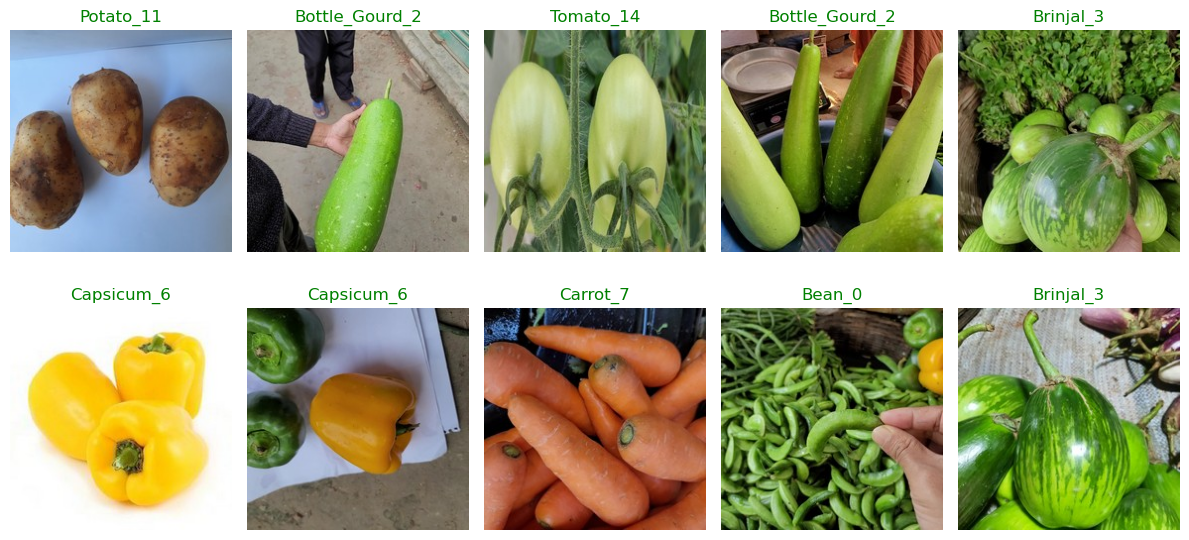

In [45]:
display_image_grid(correct_images_filepaths[-10:])

In [46]:
class VegetableDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Extract label from the filepath
        label_name = os.path.basename(os.path.dirname(image_filepath))
        label_mapping = {
            "Bean_0": 0,
            "Bitter_Gourd_1": 1,
            "Bottle_Gourd_2": 2,
            "Brinjal_3": 3,
            "Broccoli_4": 4,
            "Cabbage_5": 5,
            "Capsicum_6": 6,
            "Carrot_7": 7,
            "Cauliflower_8": 8,
            "Cucumber_9": 9,
            "Papaya_10": 10,
            "Potato_11": 11,
            "Pumpkin_12": 12,
            "Radish_13": 13,
            "Tomato_14": 14
        }
        label = label_mapping[label_name]

        if self.transform is not None:
            image = self.transform(image=image)["image"]

        return image, label


In [47]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
train_dataset = VegetableDataset(images_filepaths=correct_images_filepaths, transform=train_transform)

In [48]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

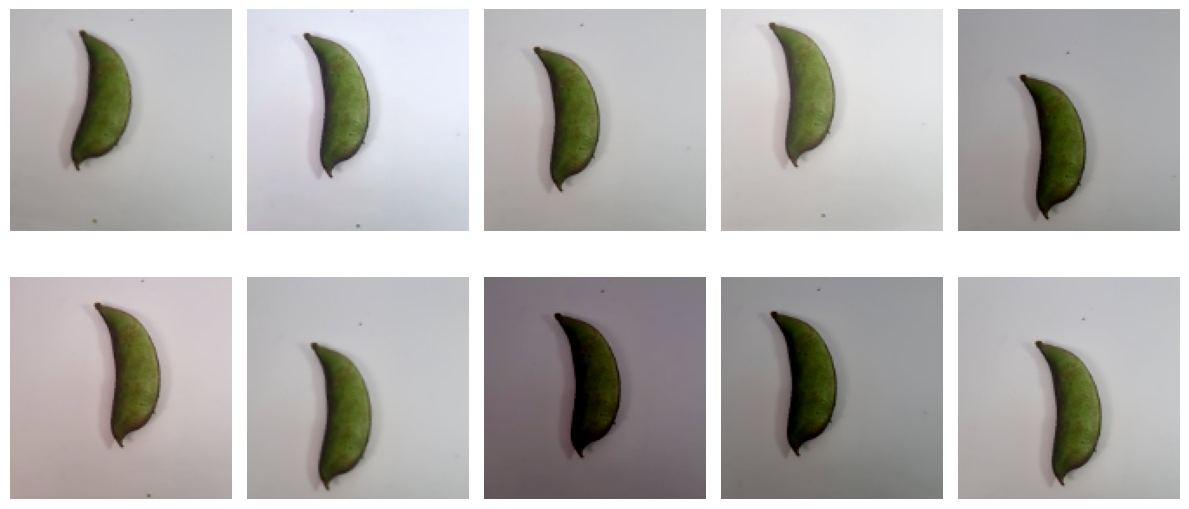

In [49]:
random.seed(42)
visualize_augmentations(train_dataset)

In [50]:
train_loader = DataLoader(
    train_dataset, batch_size=128, shuffle=True, pin_memory=True
#     , num_workers = 4
)

In [51]:
num_epochs = 2

In [52]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

model.classifier[1] = torch.nn.Linear(1280, 15)
model = model.to(device)

In [23]:
# torch.save(model.state_dict(), 'newmodel.pth')

In [53]:
model.load_state_dict(torch.load('newmodel.pth'))

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.load_state_dict(torch.load('newmodel.pth', map_location=device))

model = model.to(device)

In [56]:
root_directory = os.path.join(dataset_directory, "test")

In [57]:
root_directory_images_filepaths = natsorted([os.path.join(root_directory, f) for f in os.listdir(root_directory)])

In [58]:
class CatsVsDogsInferenceDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image

test_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
test_dataset = CatsVsDogsInferenceDataset(images_filepaths=root_directory_images_filepaths
                                          , transform=test_transform
                                         )
test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False, pin_memory=True,
)

In [59]:
model.eval()

predictions = []

for inputs in test_loader:
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        predicted_classes = outputs.argmax(dim=1)  # Получаем предсказанные классы
    
    predictions.append(predicted_classes.cpu().numpy())

predictions = np.concatenate(predictions, axis=0)

In [60]:
predictions

array([ 5, 11,  4, ...,  1, 13, 11])

In [62]:
sub_cb = pd.read_csv('sample_submission.csv')

In [63]:
sub_cb['prediction'] = predictions
sub_cb

,id,prediction
0,0,5
1,1,11
2,2,4
3,3,13
4,4,3
...,...,...
2995,2995,7
2996,2996,13
2997,2997,1
2998,2998,13


In [64]:
sub_cb.to_csv('6_predict.csv', index = False)